Lets have a first look on the data and analyse some basic properties plus obvious trends.

In [14]:
sample_csv = "/root/data/nfl-big-data-bowl-2026-prediction/train/input_2023_w01.csv"

At first read in the data and look at the dataframe. This is one of the training samples for the competition. The input samples looks like this.

In [15]:
import pandas as pd

sample_df = pd.read_csv(sample_csv)
sample_df

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285709,2023091100,3987,True,42489,29,left,87,Stefon Diggs,6-0,191,...,Targeted Receiver,74.34,14.72,4.32,5.91,294.17,337.15,11,73.870003,11.48
285710,2023091100,3987,True,42489,30,left,87,Stefon Diggs,6-0,191,...,Targeted Receiver,74.00,14.88,3.47,6.67,297.89,4.89,11,73.870003,11.48
285711,2023091100,3987,True,42489,31,left,87,Stefon Diggs,6-0,191,...,Targeted Receiver,73.74,15.03,2.73,6.85,302.45,37.86,11,73.870003,11.48
285712,2023091100,3987,True,42489,32,left,87,Stefon Diggs,6-0,191,...,Targeted Receiver,73.56,15.16,1.94,6.85,308.57,51.94,11,73.870003,11.48


We can differ between data categories. First category for me would be the identifier block with game_id, play_id, nfl_id and frame_id. The forecast should foresee the specific player (nfl_id) position in a specific frame (frame_id) during a specific play (play_id) in a specific game (game_id). So this information is part of the output as well.

Other blocks could be player information, like player name, player height, player birth date etc. or the movement tracking like x- and y-position or acceleration and orientation. Check the official description for further information. (https://www.kaggle.com/competitions/nfl-big-data-bowl-2026-prediction/data)

In [16]:
print(sample_df.columns.tolist())

['game_id', 'play_id', 'player_to_predict', 'nfl_id', 'frame_id', 'play_direction', 'absolute_yardline_number', 'player_name', 'player_height', 'player_weight', 'player_birth_date', 'player_position', 'player_side', 'player_role', 'x', 'y', 's', 'a', 'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y']


Lets reduce the dataset to an atomar part and use only one sample, which we would like to predict in the future.

In [17]:
unique_players = sample_df['player_name'].unique().tolist()
unique_players.sort()
print(unique_players)

['A.J. Brown', 'A.J. Epenesa', 'A.J. Terrell', 'AJ Dillon', 'Aaron Jones', 'Adam Prentice', 'Adam Thielen', 'Adam Trautman', "Adoree' Jackson", 'Adrian Amos', 'Adrian Phillips', 'Ahkello Witherspoon', 'Akayleb Evans', 'Akeem Davis-Gaither', 'Alec Ingold', 'Alec Pierce', 'Alex Anzalone', 'Alex Highsmith', 'Alex Singleton', 'Alex Wright', 'Alexander Mattison', 'Allen Lazard', 'Allen Robinson', 'Alohi Gilman', 'Alontae Taylor', 'Amani Hooker', 'Amari Cooper', 'Ambry Thomas', 'Ameer Abdullah', 'Amik Robertson', 'Amon-Ra St. Brown', 'Andre Chachere', 'Andre Cisco', 'Andrew Beck', 'Andrew Ogletree', 'Andrew Van Ginkel', 'Andrew Wingard', 'Anthony McFarland', 'Anthony Nelson', 'Anthony Richardson', 'Anthony Walker', 'Antoine Winfield Jr.', 'Antonio Gibson', 'Antonio Hamilton', "Ar'Darius Washington", 'Arnold Ebiketie', 'Artie Burns', 'Asante Samuel', 'Ashtyn Davis', 'Austin Ekeler', 'Austin Hooper', 'Avonte Maddox', 'Azeez Al-Shaair', 'B.J. Hill', 'Baker Mayfield', 'Ben Sims', 'Ben Skowronek'

As I am a Baltimore Ravens fanboy **Zay Flowers** is the player which I will pick in a random play and game.

In [19]:
zay_df = sample_df[sample_df['player_name'] == 'Zay Flowers'].copy()

if zay_df.empty:
    print("No rows for Zay Flowers in sample_df")
else:
    chosen_play = zay_df['play_id'].unique()[0]
    zay_play_df = zay_df[zay_df['play_id'] == chosen_play].reset_index(drop=True)
    print(f"Selected player: Zay Flowers, play_id: {chosen_play}, rows: {len(zay_play_df)}")
    zay_play_df

Selected player: Zay Flowers, play_id: 166, rows: 25


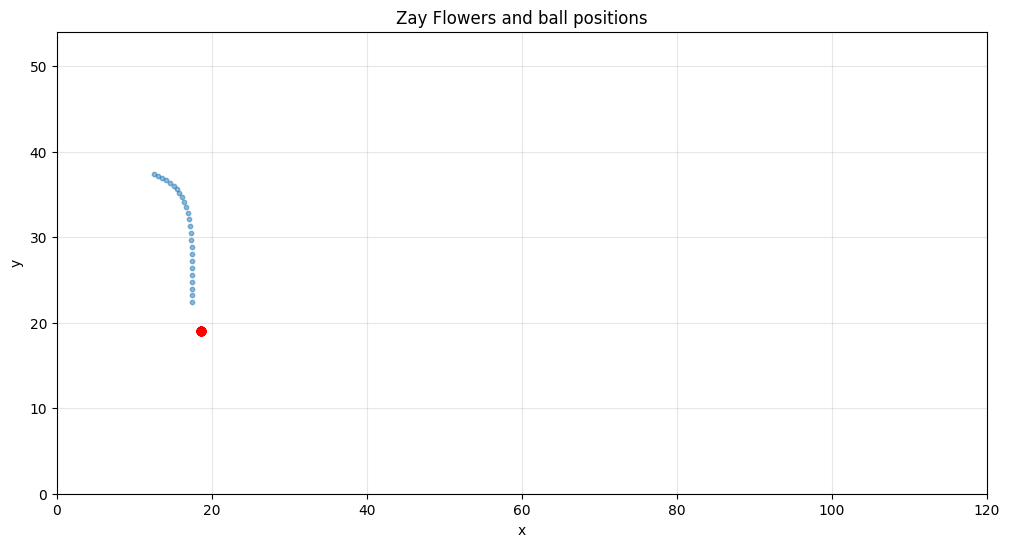

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(zay_play_df['x'], zay_play_df['y'], alpha=0.5, s=10)
plt.scatter(zay_play_df['ball_land_x'], zay_play_df['ball_land_y'], c='red')
plt.xlim(0, 120)
plt.ylim(0, 54)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Zay Flowers and ball positions')
plt.grid(True, alpha=0.3)
plt.show()

In [21]:
zay_play_df

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023091001,166,False,55886,1,right,22,Zay Flowers,5-10,172,...,Other Route Runner,17.42,22.41,7.65,0.78,358.46,32.11,7,18.620001,18.98
1,2023091001,166,False,55886,2,right,22,Zay Flowers,5-10,172,...,Other Route Runner,17.41,23.18,7.69,0.79,359.10,30.07,7,18.620001,18.98
2,2023091001,166,False,55886,3,right,22,Zay Flowers,5-10,172,...,Other Route Runner,17.41,23.97,7.86,0.78,0.04,23.53,7,18.620001,18.98
3,2023091001,166,False,55886,4,right,22,Zay Flowers,5-10,172,...,Other Route Runner,17.41,24.76,7.90,0.72,0.41,20.85,7,18.620001,18.98
4,2023091001,166,False,55886,5,right,22,Zay Flowers,5-10,172,...,Other Route Runner,17.42,25.56,7.97,0.69,0.90,18.54,7,18.620001,18.98
5,2023091001,166,False,55886,6,right,22,Zay Flowers,5-10,172,...,Other Route Runner,17.43,26.38,8.07,0.58,1.09,22.54,7,18.620001,18.98
6,2023091001,166,False,55886,7,right,22,Zay Flowers,5-10,172,...,Other Route Runner,17.44,27.21,8.18,0.45,0.85,25.17,7,18.620001,18.98
7,2023091001,166,False,55886,8,right,22,Zay Flowers,5-10,172,...,Other Route Runner,17.42,28.04,8.21,0.71,359.56,23.50,7,18.620001,18.98
8,2023091001,166,False,55886,9,right,22,Zay Flowers,5-10,172,...,Other Route Runner,17.39,28.87,8.19,1.16,358.35,22.48,7,18.620001,18.98
9,2023091001,166,False,55886,10,right,22,Zay Flowers,5-10,172,...,Other Route Runner,17.34,29.70,8.24,1.42,356.95,20.26,7,18.620001,18.98


In [22]:
game_id = zay_play_df['game_id'].iloc[0]
play_id = zay_play_df['play_id'].iloc[0]

play_data = sample_df[(sample_df['game_id'] == game_id) & (sample_df['play_id'] == play_id)]
play_data

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
35765,2023091001,166,False,54540,1,right,22,Christian Harris,6-2,232,...,Defensive Coverage,25.64,30.05,1.99,2.40,353.96,268.99,7,18.620001,18.98
35766,2023091001,166,False,54540,2,right,22,Christian Harris,6-2,232,...,Defensive Coverage,25.62,30.26,2.23,2.05,353.71,268.99,7,18.620001,18.98
35767,2023091001,166,False,54540,3,right,22,Christian Harris,6-2,232,...,Defensive Coverage,25.59,30.49,2.43,1.64,353.27,270.90,7,18.620001,18.98
35768,2023091001,166,False,54540,4,right,22,Christian Harris,6-2,232,...,Defensive Coverage,25.55,30.73,2.53,1.13,352.28,275.55,7,18.620001,18.98
35769,2023091001,166,False,54540,5,right,22,Christian Harris,6-2,232,...,Defensive Coverage,25.51,31.00,2.69,0.92,352.04,273.21,7,18.620001,18.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36085,2023091001,166,True,54604,21,right,22,Isaiah Likely,6-4,240,...,Targeted Receiver,18.84,22.97,3.02,3.57,171.08,194.17,7,18.620001,18.98
36086,2023091001,166,True,54604,22,right,22,Isaiah Likely,6-4,240,...,Targeted Receiver,18.90,22.63,3.53,3.55,169.00,201.88,7,18.620001,18.98
36087,2023091001,166,True,54604,23,right,22,Isaiah Likely,6-4,240,...,Targeted Receiver,18.98,22.25,4.00,3.39,167.96,206.76,7,18.620001,18.98
36088,2023091001,166,True,54604,24,right,22,Isaiah Likely,6-4,240,...,Targeted Receiver,19.06,21.83,4.42,2.94,168.16,211.65,7,18.620001,18.98


/tmp/ipykernel_21706/4110111442.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(players))


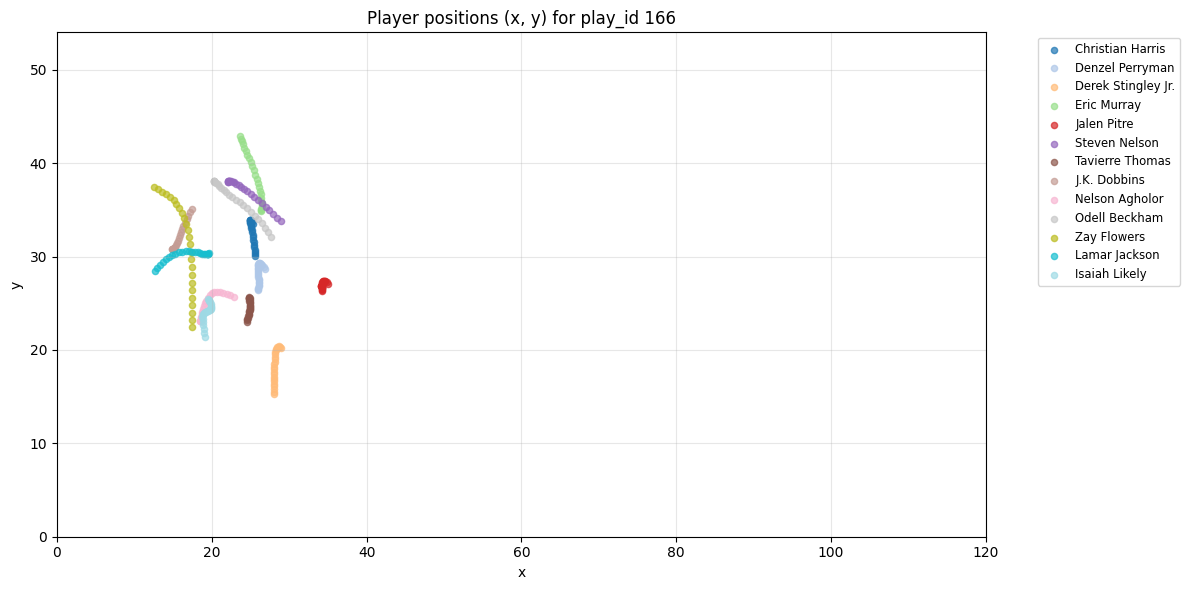

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
players = play_data['player_name'].unique()
colors = plt.cm.get_cmap('tab20', len(players))

for idx, player in enumerate(players):
    player_df = play_data[play_data['player_name'] == player]
    plt.scatter(player_df['x'], player_df['y'], label=player, color=colors(idx), s=20, alpha=0.7)

plt.xlim(0, 120)
plt.ylim(0, 54)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Player positions (x, y) for play_id {}'.format(play_data['play_id'].iloc[0]))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()